<a href="https://colab.research.google.com/github/cagBRT/Intro-to-Programming-with-Python/blob/master/Python_tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdev.com/tricks-and-best-practices-from-kaggle-794a5914480f

In [24]:
# Clone the entire repo.
!git clone -s https://github.com/cagBRT/Data.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 660, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 660 (delta 220), reused 254 (delta 173), pack-reused 327
Receiving objects: 100% (660/660), 2.73 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (393/393), done.
/content/cloned-repo


we are counting each combination of diamond cut and clarity using pd.crosstab Using the .style.background_gradient with a color palette, you can easily spot which combinations occur the most. From the below DataFrame only, we can see that the majority of diamonds are of ideal cut and the largest combination is with the ‘VS2’ type of clarity.

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

diamonds = sns.load_dataset('diamonds')

pd.crosstab(diamonds.cut, diamonds.clarity).\
                style.background_gradient(cmap='rocket_r')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146
Premium,230,616,870,1989,3357,3575,2949,205
Very Good,268,789,1235,1775,2591,3240,2100,84
Good,71,186,286,648,978,1560,1081,96
Fair,9,17,69,170,261,408,466,210


finding the average price of each diamond cut and clarity combination in crosstab

In [17]:
pd.crosstab(diamonds.cut, diamonds.clarity,
          aggfunc=np.mean, values=diamonds.price).\
          style.background_gradient(cmap='flare')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.913366,2468.129458,3250.290100,3489.744497,3284.550385,3752.118169,4755.952656,4335.726027
Premium,3856.143478,2831.206169,3795.122989,4485.462041,4550.331248,4455.269371,5545.936928,3947.331707
Very Good,4396.216418,2459.441065,3037.765182,3805.353239,4215.759552,3932.391049,4988.688095,4078.226190
Good,4098.323944,2254.774194,3079.108392,3801.445988,4262.236196,3689.533333,4580.260870,3596.635417
Fair,1912.333333,3871.352941,3349.768116,4165.141176,4174.724138,4208.279412,5173.916309,3703.533333


In [18]:
agg_prices = pd.crosstab(diamonds.cut, diamonds.clarity,
                         aggfunc=np.mean, values=diamonds.price).\
                         style.background_gradient(cmap='flare')

agg_prices.format('{:.2f}')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.91,2468.13,3250.29,3489.74,3284.55,3752.12,4755.95,4335.73
Premium,3856.14,2831.21,3795.12,4485.46,4550.33,4455.27,5545.94,3947.33
Very Good,4396.22,2459.44,3037.77,3805.35,4215.76,3932.39,4988.69,4078.23
Good,4098.32,2254.77,3079.11,3801.45,4262.24,3689.53,4580.26,3596.64
Fair,1912.33,3871.35,3349.77,4165.14,4174.72,4208.28,5173.92,3703.53


<ipython-input-19-2a44905e07e0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = diamonds.corr()


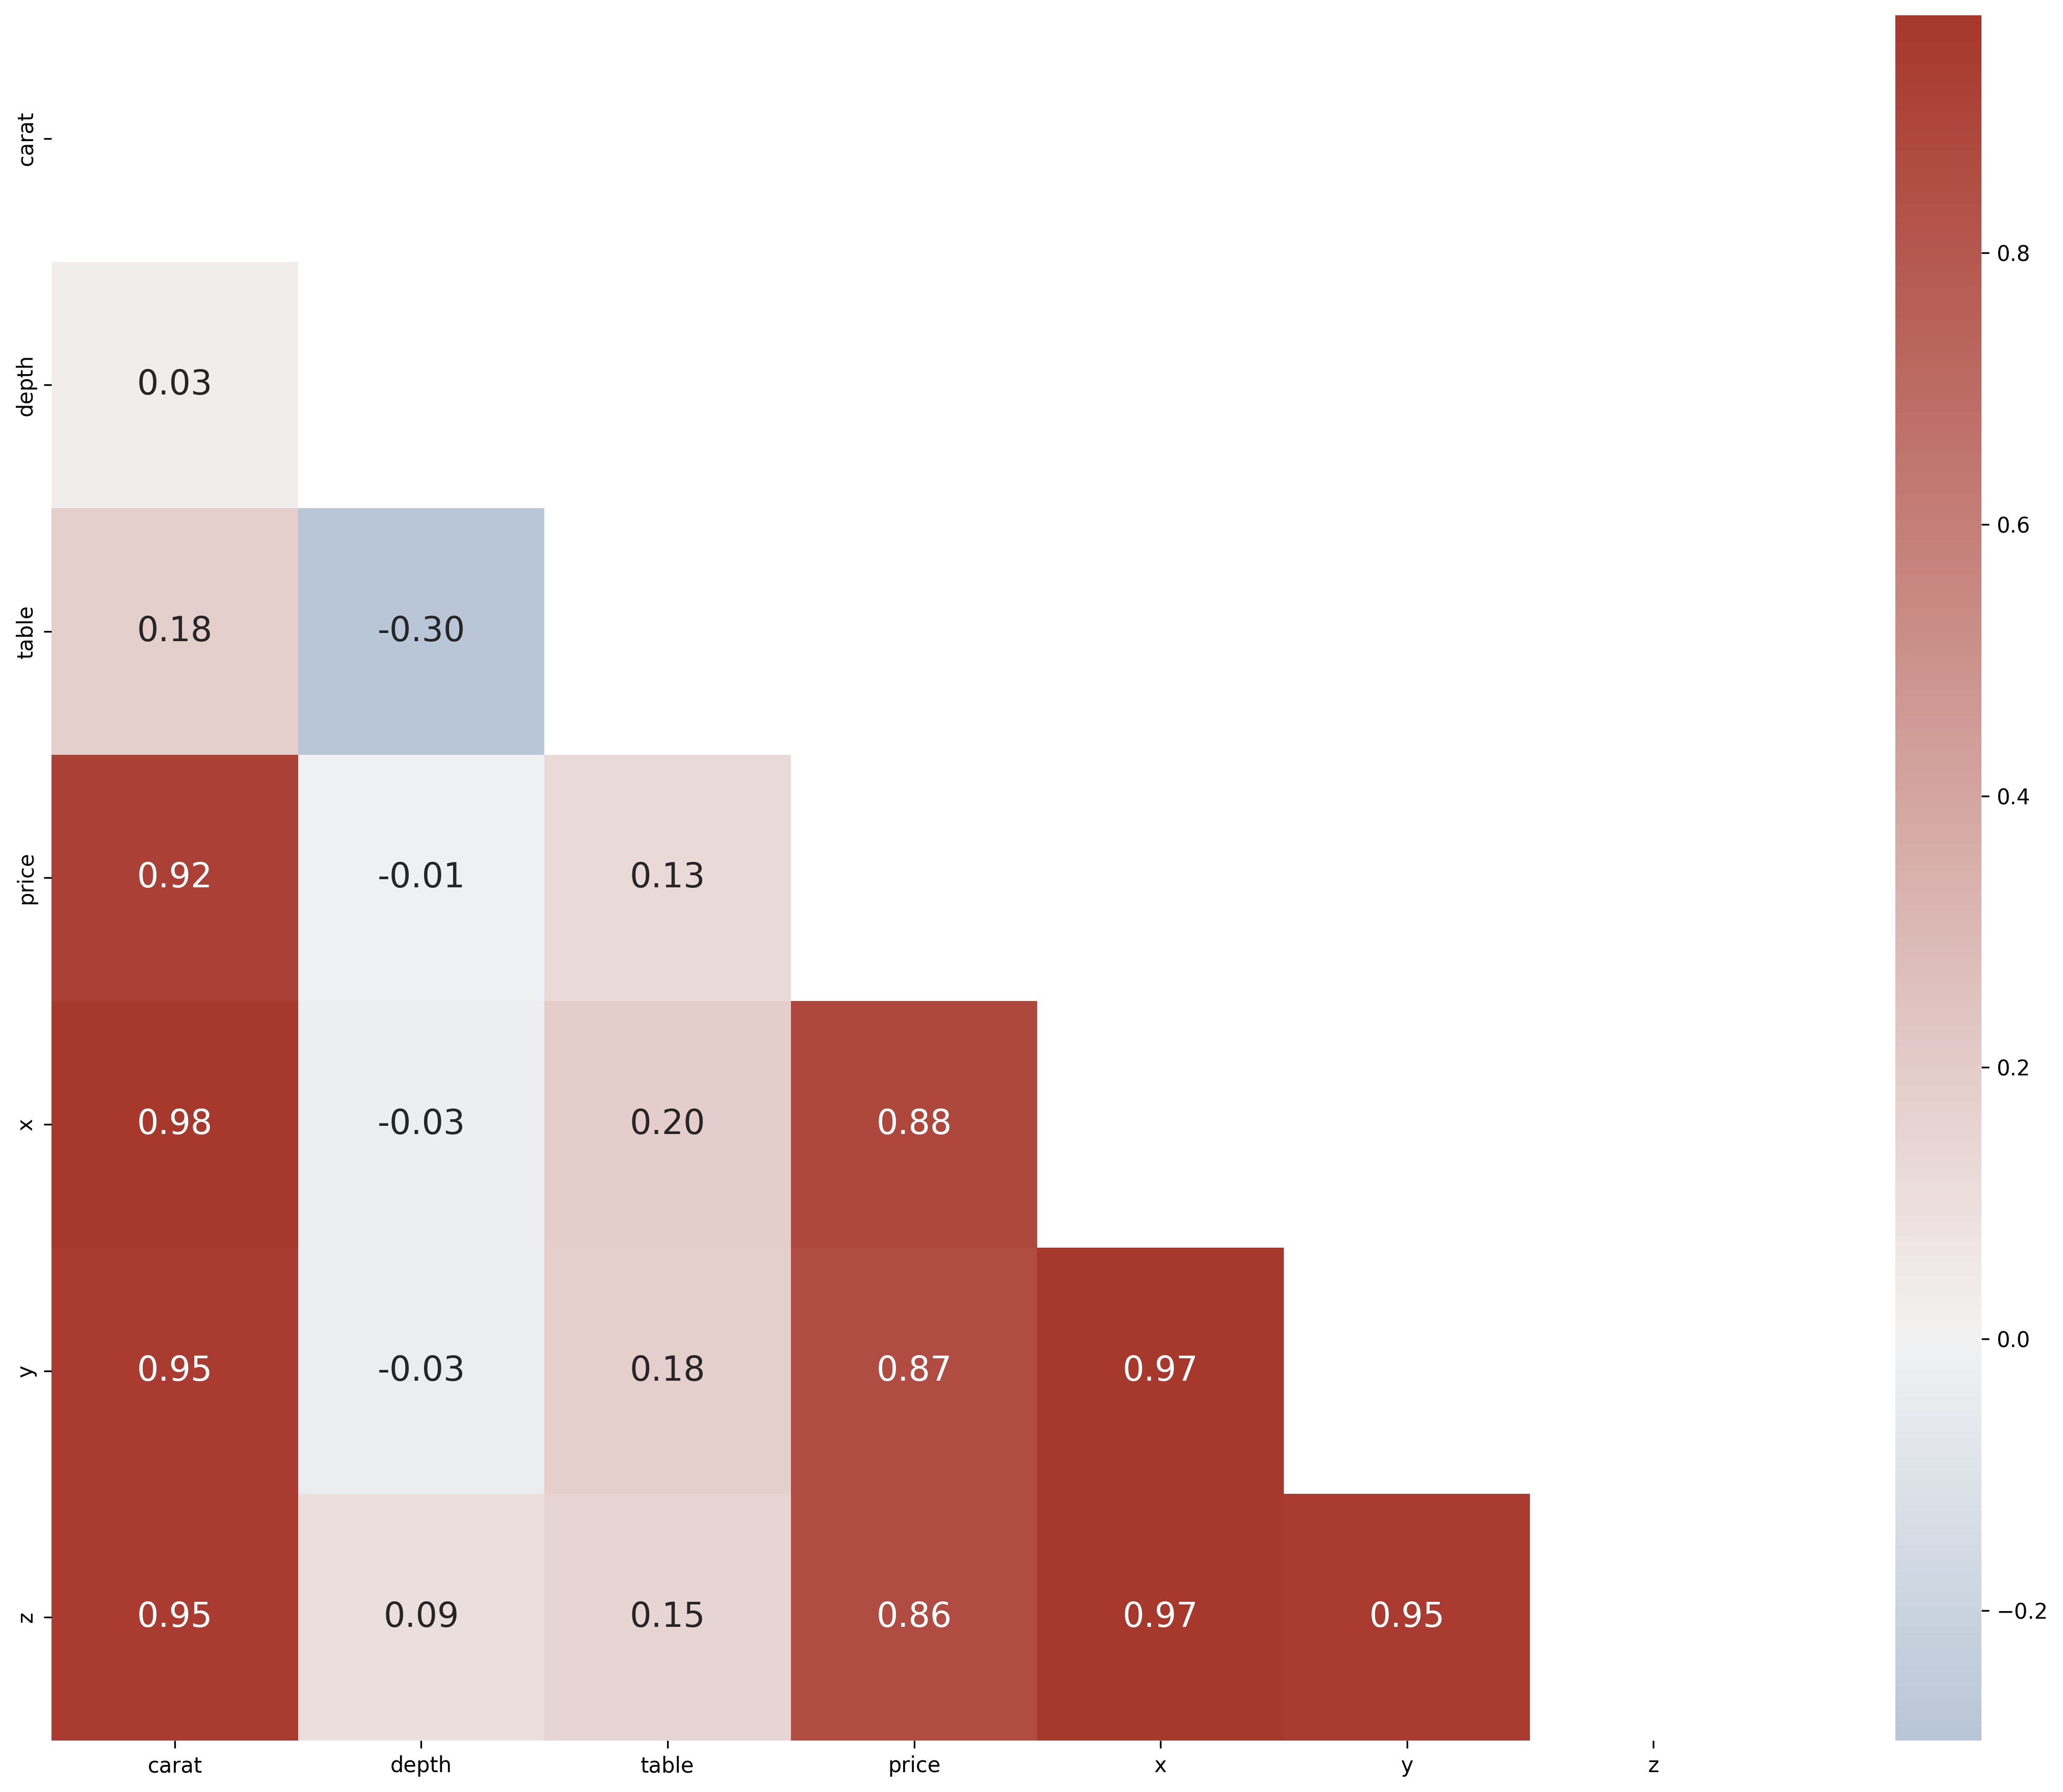

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate pairwise-correlation
matrix = diamonds.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

You can avoid a lot of repetition by setting these right after you import Matplotlib. See all the other available settings by calling rcParams.keys().

In [20]:
from matplotlib import rcParams

# Remove top and right spines
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Set fixed figure size
rcParams['figure.figsize'] = [12, 9]

# Set dots per inch to 300, very high quality images
rcParams['figure.dpi'] = 300

# Enable autolayout
rcParams['figure.autolayout'] = True

# Set global fontsize
rcParams.update({'font.size': 22})
rcParams.update({'font.size': 16})

# Fontsize of ticklabels
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

# **Pandas GroupBy function**

In [21]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("melb_data.csv", usecols = ['Price','Landsize','Distance','Type', 'Regionname'])
df = df[(df.Price < 3_000_000) & (df.Landsize < 1200)].sample(n=1000).reset_index(drop=True)
df.head()

,Type,Price,Distance,Landsize,Regionname
0,u,500000.0,8.5,0.0,Southern Metropolitan
1,h,482000.0,17.4,452.0,Northern Metropolitan
2,u,550000.0,7.2,605.0,Southern Metropolitan
3,h,870000.0,13.8,698.0,Eastern Metropolitan
4,h,560000.0,13.3,615.0,Western Metropolitan


In [26]:
df[['Type','Distance']].groupby('Type').mean()

,Distance
Type,
h,10.724640
t,8.946429
u,7.809910


In [27]:
df[['Type','Distance']].groupby('Type').agg(
   avg_distance = ('Distance', 'mean')
)


,avg_distance
Type,
h,10.724640
t,8.946429
u,7.809910


In [28]:
df[['Type','Distance']].groupby('Type').agg(
  avg_distance = ('Distance', 'mean'),
  median_distance = ('Distance', 'median')
)

,avg_distance,median_distance
Type,,
h,10.724640,9.90
t,8.946429,9.15
u,7.809910,7.30


In [29]:
df[['Type','Price']].groupby('Type').agg(
   avg_price_million = ('Price', lambda x: x.mean() / 1_000_000)
).round(2)

,avg_price_million
Type,
h,1.19
t,0.94
u,0.62


In [30]:
df[['Type','Regionname', 'Distance']]\
.groupby(['Type','Regionname']).mean().head()

Distance
Type Regionname                           
h    Eastern Metropolitan        13.509877
     Eastern Victoria            36.050000
     Northern Metropolitan        8.525000
     Northern Victoria           27.450000
     South-Eastern Metropolitan  22.845161

In [31]:
df[['Type','Regionname', 'Distance']]\
.groupby(['Type','Regionname'], as_index=False).mean().head()

,Type,Regionname,Distance
0,h,Eastern Metropolitan,13.509877
1,h,Eastern Victoria,36.050000
2,h,Northern Metropolitan,8.525000
3,h,Northern Victoria,27.450000
4,h,South-Eastern Metropolitan,22.845161


In [32]:
df.iloc[100:150, 0] = np.nan


In [33]:
df[['Type','Distance']].groupby('Type').mean()


,Distance
Type,
h,10.753577
t,9.121519
u,7.857944


In [34]:
df[['Type','Distance']].groupby('Type', dropna=False).mean()


,Distance
Type,
h,10.753577
t,9.121519
u,7.857944
NaN,9.218000
